## 1 Initial Setup
Following tutorial from Langchain Opentutorial: https://github.com/LangChain-OpenTutorial/LangChain-OpenTutorial

Currently using Python 3.12
Includes LangSmith for collecting usage information
https://docs.smith.langchain.com/

In [ ]:
# Libraries needed
%pip install python-dotenv
%pip install --quiet --upgrade langchain-text-splitters langchain-community langgraph
%pip install -U langchain langchain-openai

In [8]:
# Step 1: Import required libraries
import os
from langchain.embeddings.openai import OpenAIEmbeddings
from langchain.vectorstores import Pinecone
from langchain.docstore.document import Document
from langchain.llms import OpenAI
from langchain.chains import RetrievalQA
from dotenv import load_dotenv

# Load API keys from .env file 
load_dotenv(override=True)

True

In [ ]:
# Step 2: Check API KEY
import os
print(f"[API KEY]\n{os.environ['OPENAI_API_KEY']}")

# Initial Test with Open AI
Change the llm.invoke string to change query

In [2]:
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
llm.invoke("Tell me a joke about graduate students.")

AIMessage(content='Why did the graduate student bring a ladder to the library?\n\nBecause they heard they needed to climb the academic ladder to succeed!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 26, 'prompt_tokens': 15, 'total_tokens': 41, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'id': 'chatcmpl-BCcFmfUahq7ifu3oEx2JRavWfFni3', 'finish_reason': 'stop', 'logprobs': None}, id='run-7d10d255-7be8-4a4d-aea2-0a8f32b0803d-0', usage_metadata={'input_tokens': 15, 'output_tokens': 26, 'total_tokens': 41, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

## Using other OpenAI models
examples: gpt-4o, gpt-4o-mini

In [10]:
from langchain_openai.chat_models import ChatOpenAI

# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=1.5,  # Creativity (range: 0.0 ~ 2.0), larger value, more creative
    # max_tokens=100,  # Maximum number of tokens to generate
    model_name="gpt-4o-mini",  # Model name
)

question = "Tell me a joke about graduate students."

#print(f"[Answer]: {llm.invoke(question)}")

# Extract key components
response = llm.invoke(question)
content = response.content  # AI's response text
model_name = response.response_metadata["model_name"]
total_tokens = response.response_metadata["token_usage"]["total_tokens"]

# Print results
print(f"Response: {content}")
print(f"Model: {model_name}")
print(f"Total Tokens Used: {total_tokens}")

Response: Why don't graduate students play hide and seek?

Because good luck hiding when they have to stop and collect data!
Model: gpt-4o-mini-2024-07-18
Total Tokens Used: 38


## Streaming Output

Responses are generated similar to regular ChatGPT interactions instead of all at once like the last cells.

In [4]:
# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=1.5,  # Creativity (range: 0.0 ~ 2.0), larger value, more creative
    # max_tokens=100,  # Maximum number of tokens to generate
    model_name="gpt-4o-mini",  # Model name
)

answer = llm.stream(
    "Describe ideologies about science education held by teachers!"
)

# Streaming real-time output
for token in answer:
    print(token.content, end="", flush=True)

Teachers' ideologies about science education can vary widely based on their beliefs about effective teaching practices, the role of science in society, student learning processes, and overall educational philosophies. Here are some common ideologies that may shape teachers' approaches to science education:

1. **Constructivism**: Many educators believe in constructivist approaches, where students learn by actively constructing knowledge through hands-on activities, experiments, and inquiry-based learning. Teachers who hold this ideology often emphasize the importance of experiences and real-world applications in the science classroom, encouraging exploration, collaboration, and problem-solving.

2. **Direct Instruction**: Some educators might favor a more traditional or behaviorist form of teaching that relies on direct instruction, lectures, and standardized testing. In this ideology, the primary focus is on content delivery and the acquisition of specific scientific knowledge and fac

## Text and Image processing using vision

## #1 Setup up LLM object

In [6]:
# Create the ChatOpenAI object
llm = ChatOpenAI(
    temperature=0.1,
    model_name="gpt-4o",
    streaming=True,  # Enable streaming for real-time output
)

## #2 Encoding Images into Base64 format for processing setup 
Images can be either in a local folder or on a website

In [7]:
import requests
import base64
import mimetypes
from IPython.display import display, HTML, Image


def encode_image(image_path_or_url):
    if image_path_or_url.startswith("http://") or image_path_or_url.startswith(
        "https://"
    ):
        # Download image from URL
        response = requests.get(image_path_or_url)
        if response.status_code == 200:
            image_content = response.content
        else:
            raise Exception(f"Failed to download image: {response.status_code}")
        # Guess MIME type based on URL
        mime_type, _ = mimetypes.guess_type(image_path_or_url)
        if mime_type is None:
            mime_type = (
                "application/octet-stream"  # Default MIME type for unknown files
            )
    else:
        # Read image from local file
        try:
            with open(image_path_or_url, "rb") as image_file:
                image_content = image_file.read()
            # Guess MIME type based on file extension
            mime_type, _ = mimetypes.guess_type(image_path_or_url)
            if mime_type is None:
                mime_type = (
                    "application/octet-stream"  # Default MIME type for unknown files
                )
        except FileNotFoundError:
            raise Exception(f"File not found: {image_path_or_url}")

    # Base64 encode the image
    return f"data:{mime_type};base64,{base64.b64encode(image_content).decode()}"

## Example using image from found on the internet
Change the url to change the image


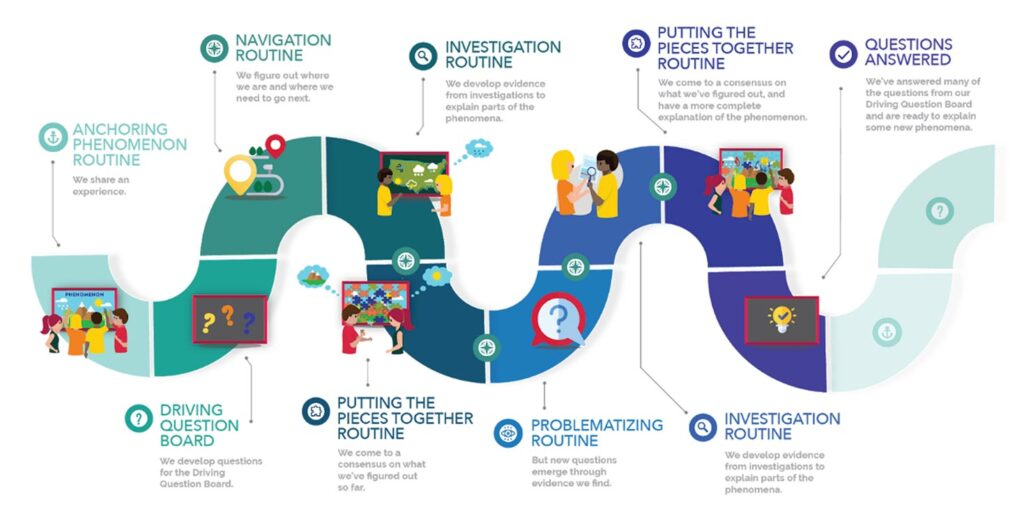

In [8]:
IMAGE_URL = "https://activatelearning.com/wp-content/uploads/2024/10/OpenSciEd-Storylines-Structure-1024x505.jpg"
encoded_image_url = encode_image(IMAGE_URL)
display(Image(url=encoded_image_url))  # Display the image

## Local Image


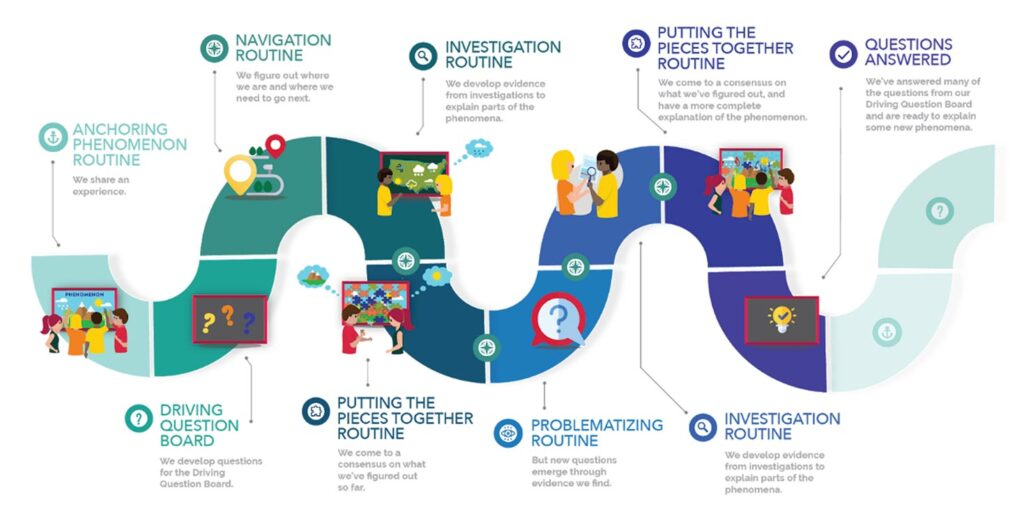

In [9]:
IMAGE_PATH = "images/OpenSciEd-Storylines-Structure-1024x505.jpg"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))  # Display the image

## #3 Create the message
Define a function to generate the messages required for the model. This includes:

- **System Prompt**: Defines the role and task for the AI.
- **User Prompt**: Provides the specific task instructions.
- **Encoded Image**: Includes the Base64 image data.


**System Prompt**
Defines the AI's identity, responsibilities, and behavior for the session:

* Sets the AI's context, ensuring consistent responses.
* Example: "You are a financial assistant specializing in interpreting tables."

**User Prompt**
Gives task-specific instructions to guide the AI:

* Specifies what the user expects the AI to do.
* Example: "Analyze this financial table and summarize the insights."

In [10]:
# Function to create messages for the AI
def create_messages(encoded_image):
    system_prompt = "You are a helpful assistant on parsing images."
    user_prompt = "Explain the given images in-depth."
    return [
        {"role": "system", "content": system_prompt},
        {
            "role": "user",
            "content": [
                {"type": "text", "text": user_prompt},
                {"type": "image_url", "image_url": {"url": encoded_image}},
            ],
        },
    ]

## #4 Model Interaction

Send message to model and stream output

In [11]:
def stream_response(llm, messages):
    response = llm.stream(messages)  # Stream AI response
    print("Streaming response:")
    for chunk in response:
        print(
            chunk.content, end="", flush=True
        )  # Print each response chunk in real time

In [12]:
# Display the image
display(Image(url=IMAGE_URL))
encoded_image_url = encode_image(IMAGE_URL)

#  Create messages and stream responses
messages_url = create_messages(encoded_image_url)
stream_response(llm, messages_url)

Streaming response:
The image is a flowchart illustrating a learning process or educational routine. Here's a detailed breakdown:

1. **Anchoring Phenomenon Routine**:
   - **Description**: This is the starting point where an experience is shared.
   - **Purpose**: To engage learners by presenting a phenomenon that sparks curiosity.

2. **Driving Question Board**:
   - **Description**: Questions are developed for the Driving Question Board.
   - **Purpose**: To guide the investigation and focus on key questions that need answers.

3. **Navigation Routine**:
   - **Description**: This step involves figuring out the current position in the learning process and determining the next steps.
   - **Purpose**: To assess progress and plan future actions.

4. **Investigation Routine**:
   - **Description**: Evidence is developed from investigations to explain parts of the phenomenon.
   - **Purpose**: To gather data and insights that help in understanding the phenomenon.

5. **Problematizing Ro

## Local image interpretation


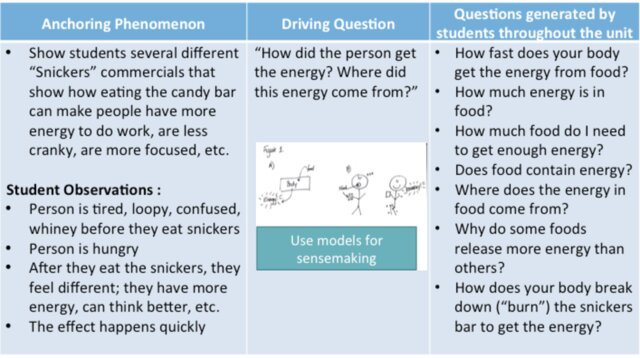

Streaming response:
The image is a structured educational framework designed to explore the concept of energy derived from food, using Snickers commercials as a relatable example. Here's a detailed breakdown:

### Anchoring Phenomenon
- **Description**: The phenomenon involves showing students Snickers commercials that suggest eating the candy bar provides energy, improves focus, and reduces crankiness.
- **Student Observations**:
  - Before eating Snickers, a person appears tired, confused, and whiny.
  - The person is hungry.
  - After consuming Snickers, they feel more energetic and can think more clearly.
  - The change in energy and mood occurs quickly.

### Driving Question
- **Core Inquiry**: "How did the person get the energy? Where did this energy come from?"
- This question is central to understanding the biological and chemical processes involved in energy acquisition from food.

### Questions Generated by Students
- **Exploration of Concepts**:
  - **Energy Absorption**: Ho

In [14]:
# Encoding image
IMAGE_PATH = "images/Storyline-for-Anchoring-Phenomenon_W640.jpg"
encoded_image_file = encode_image(IMAGE_PATH)
html_code = f'<img src="{encoded_image_file}" alt="Image" style="max-width: 100%; height: auto;">'
display(HTML(html_code))

# Create messages and stream responses
messages_file = create_messages(encoded_image_file)
stream_response(llm, messages_file)